In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xlrd
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter
import os
from sklearn import linear_model
font = {'family': 'arial',
        'weight': 'normal',
        'size': '16'}

In [122]:
cost={}
z, m, n, k = 900, 14400, 2000, 10#900, 14400, 2000, 10
cost['EDF_tid'] = (z + m*n + n*k) # 6 = flow factor
cost['BRP_tid'] = z + m*n + n*k + k*n + k*m + k*z
cost['Eprop_tid'] = z + m*n + n*k + n*n + k*n + n*n + k*m + k*z
cost['NRR_tid'] = z + m*n + n*k + n*n + k*n + n*n + k*m + k*z
z, m, n, k = 784, 12544, 2000, 10#784, 12544, 2000, 10
cost['EDF_mni'] = ( z + m*n + n*k)
cost['BRP_mni'] = z + m*n + n*k + k*n + k*m + k*z
cost['Eprop_mni'] = z + m*n + n*k + n*n + k*n + n*n + k*m + k*z
cost['NRR_mni'] = z + m*n + n*k + n*n + k*n + n*n + k*m + k*z

# TIDigits Cost

(2, 100)
EDF
0.9827302631578948
0.16447368421052744
(2, 100)
BRP
0.9594051446945338
0.28135048231511917
(2, 100)
Eprop
0.970394746253365
0.3947370930721945
(2, 100)
NRR
0.9787006707567918
0.17269739979191456


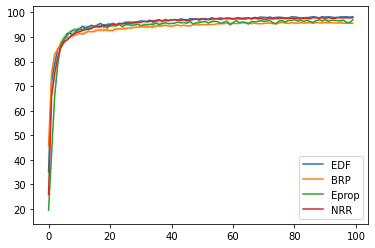

min 0.03778135048231505 max 0.4
[0.03778135 0.12833601 0.21889068 0.30944534 0.4       ]
[0.03778135 0.12833601 0.21889068 0.30944534 0.4       ]
           EDF       BRP     Eprop       NRR
mean  2.363314  5.856768  4.846201  3.551414
std   0.230567  0.695854  0.258957  0.147976


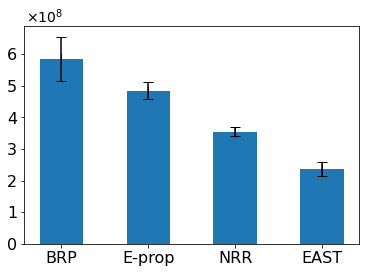

In [123]:
def plot(list_,label,index):
    acc_list = []
    length = []
    for i in range(len(list_)):
        file = open(os.path.join(rootpath,list_[i]),'r').readlines()
        length.append(len(file))
    max_=min(length)
    for j in range(len(list_)):
        acc = []
        file = open(os.path.join(rootpath,list_[j]),'r').readlines()
        for i in range(len(file)):
            acc.append(float(file[i].split(' ')[1].split('\n')[0]))
        acc_list.append(acc[:max_])
#         print(j)
        data_all[j,:,index] = acc[:max_]
    acc_list = np.array(acc_list)
    
    print(acc_list.shape)
    plt.plot(np.arange(acc_list.shape[1]),acc_list.mean(0),label=label)
    print(label)
    print(acc_list.mean(0).max()/100)
    lambda_std = 1
    print(acc_list.std(0)[np.where(acc_list.mean(0)==acc_list.mean(0).max())[0][0]])
    plt.fill_between(range(acc_list.shape[1]), (acc_list.mean(0) - lambda_std * acc_list.std(0)), (acc_list.mean(0) + lambda_std * acc_list.std(0)), alpha=.3)
    
data_all = np.zeros((2, 100, 4))
colors = ['#0780cf', '#765005', '#fa6d1d', '#0e2c82', '#b6b51f', '#da1f18', '#701866', '#f47a75', '#009db2', '#024b51', '#0780cf', '#765005']
fig, ax = plt.subplots(1, 1)

rootpath = 'C:\code\EDF\Cost\data\EDF'
plot(['2021_09_23_22_32_19_TIDigits_seed0/testacc.txt',
      '2021_09_23_22_32_39_TIDigits_seed1/testacc.txt'],'EDF',0)
rootpath = 'C:\code\EDF\Cost\data\BRP'
plot(['2021_09_23_15_53_29_TIDigits_seed-0/testacc.txt',
      '2021_09_23_15_52_41_TIDigits_seed-1/testacc.txt'],'BRP',1)
rootpath = 'C:\code\EDF\Cost\data\Eprop'
plot(['2021_09_23_16_54_57_TIDigits_seed/2021_09_23_16_54_57_TIDigits_seed-0/testacc.txt',
      '2021_09_23_16_55_03_TIDigits_seed/2021_09_23_16_55_03_TIDigits_seed-1/testacc.txt'],'Eprop',2)
rootpath = 'C:\code\EDF\Cost\data/NRR'
plot(['2021_09_23_19_21_33_TIDigits_seed/2021_09_23_19_21_33_TIDigits_seed-0/testacc.txt',
      '2021_09_23_22_05_28_TIDigits_seed/2021_09_23_22_05_28_TIDigits_seed-1/testacc.txt'],'NRR',3)
plt.legend()
plt.show()

data_all = (100 - data_all)/100

methods_list = {}
methods_list['EDF'] = []
methods_list['BRP'] = []
methods_list['Eprop'] = []
methods_list['NRR'] = []
min_ = max(data_all[:,:,0].min(), 
        data_all[:,:,1].min(),
        data_all[:,:,2].min(),
        data_all[:,:,3].min())
# min_=0.4
max_ = min(data_all[:,:,0].max(), 
        data_all[:,:,1].max(), 
        data_all[:,:,2].max(), 
        data_all[:,:,3].max(),0.4)
print('min',min_,'max',max_)
for index in range(2):
    x = np.linspace(min_, max_, 5)
    print(x)
    sub_methods_list = {}
    sub_methods_list['EDF'] = []
    sub_methods_list['BRP'] = []
    sub_methods_list['Eprop'] = []
    sub_methods_list['NRR'] = []
    for i in range(len(x)):
        try: a = np.where(data_all[index,:,0] <= x[i])[0][0]     # epoch - 1
        except: a = 99
        try: b = np.where(data_all[index,:,1] <= x[i])[0][0]  # epoch - 1
        except: b = 99
        try: c = np.where(data_all[index,:,2] <= x[i])[0][0]  # epoch - 1
        except: c = 99
        try: d = np.where(data_all[index,:,3] <= x[i])[0][0]  # epoch - 1
        except: d = 99
        sub_methods_list['EDF'].append(a+1)
        sub_methods_list['BRP'].append(b+1)
        sub_methods_list['Eprop'].append(c+1)
        sub_methods_list['NRR'].append(d+1)
    methods_list['EDF'].append(sub_methods_list['EDF'])
    methods_list['BRP'].append(sub_methods_list['BRP'])
    methods_list['Eprop'].append(sub_methods_list['Eprop'])
    methods_list['NRR'].append(sub_methods_list['NRR'])
methods_list['EDF'] = np.array(methods_list['EDF'])
methods_list['BRP'] = np.array(methods_list['BRP'])
methods_list['Eprop'] = np.array(methods_list['Eprop'])
methods_list['NRR'] = np.array(methods_list['NRR'])
df = pd.DataFrame({
            'EDF':[methods_list['EDF'].mean(1).mean(0)*cost['EDF_tid'], 
                     methods_list['EDF'].mean(1).std(0)*cost['EDF_tid']],
            'BRP':[methods_list['BRP'].mean(1).mean(0)*cost['BRP_tid'], 
                   methods_list['BRP'].mean(1).std(0)*cost['BRP_tid']],
            'Eprop':[methods_list['Eprop'].mean(1).mean(0)*cost['Eprop_tid'], 
                     methods_list['Eprop'].mean(1).std(0)*cost['Eprop_tid']],
            'NRR':[methods_list['NRR'].mean(1).mean(0)*cost['NRR_tid'], 
                     methods_list['NRR'].mean(1).std(0)*cost['NRR_tid']],
}, index=['mean', 'std'])
print(df/1e8)

# df1 = df1/1e8
df1 = df/1e8
plt.bar(0, df1.iloc[0,1], width=0.5, color='C0', label='BRP')
plt.errorbar(0, df1.iloc[0,1], fmt=' ', yerr=df1.iloc[1,1], xerr=0, capsize=5, color='k')
plt.bar(1, df1.iloc[0,2], width=0.5, color='C0', label='E-prop')
plt.errorbar(1, df1.iloc[0,2], fmt=' ', yerr=df1.iloc[1,2], xerr=0, capsize=5, color='k')
plt.bar(2, df1.iloc[0,3], width=0.5, color='C0', label='NRR')
plt.errorbar(2, df1.iloc[0,3], fmt=' ', yerr=df1.iloc[1,3], xerr=0, capsize=5, color='k')
plt.bar(3, df1.iloc[0,0], width=0.5, color='C0', label='EAST')
plt.errorbar(3, df1.iloc[0,0], fmt=' ', yerr=df1.iloc[1,0], xerr=0, capsize=5, color='k')
plt.yticks(fontsize=16)
plt.xticks(range(4),['BRP','E-prop','NRR','EAST'],fontsize=16)
plt.text(-0.4,7,s='$× 10^8$',fontsize=14)
plt.savefig('tid_cost.svg')
plt.show()

In [125]:
0.23/6

0.03833333333333334

# MNIST Cost

(2, 100)
EDF
0.9803185096153846
0.0651041666666643
(2, 100)
BRP
0.9884499999999999
0.015000000000000568
(2, 100)
Eprop
0.976297086248031
0.024539346878341917
(2, 100)
NRR
0.9855769282350173
0.06310097300089268


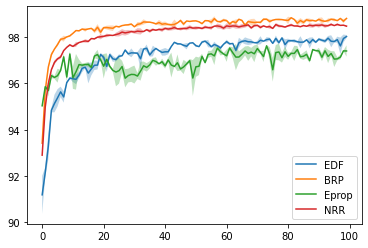

min 0.022756401544962158 max 0.050390615677222285
[0.0227564  0.02966496 0.03657351 0.04348206 0.05039062]
[0.0227564  0.02966496 0.03657351 0.04348206 0.05039062]
           EDF       BRP     Eprop       NRR
mean  4.469364  0.884172  7.051558  1.895938
std   0.150653  0.025262  0.731765  0.033262


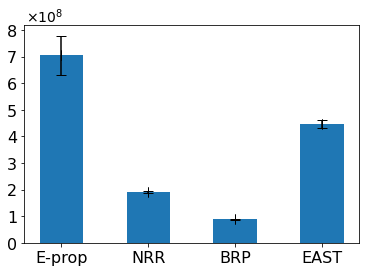

In [129]:
def plot(list_,label,index):
    acc_list = []
    length = []
    for i in range(len(list_)):
        file = open(os.path.join(rootpath,list_[i]),'r').readlines()
        length.append(len(file))
    max_=min(length)
    for j in range(len(list_)):
        acc = []
        file = open(os.path.join(rootpath,list_[j]),'r').readlines()
        for i in range(len(file)):
            acc.append(float(file[i].split(' ')[1].split('\n')[0]))
        acc_list.append(acc[:max_])
#         print(j)
        data_all[j,:,index] = acc[:max_]
    acc_list = np.array(acc_list)
    
    print(acc_list.shape)
    plt.plot(np.arange(acc_list.shape[1]),acc_list.mean(0),label=label)
    print(label)
    print(acc_list.mean(0).max()/100)
    print(acc_list.std(0)[np.where(acc_list.mean(0)==acc_list.mean(0).max())[0][0]])
    plt.fill_between(range(acc_list.shape[1]), (acc_list.mean(0) - lambda_std * acc_list.std(0)), (acc_list.mean(0) + lambda_std * acc_list.std(0)), alpha=.3)
    
data_all = np.zeros((2, 100, 4))
colors = ['#0780cf', '#765005', '#fa6d1d', '#0e2c82', '#b6b51f', '#da1f18', '#701866', '#f47a75', '#009db2', '#024b51', '#0780cf', '#765005']
fig, ax = plt.subplots(1, 1)

rootpath = 'C:\code\EDF\Cost\data\EDF'
plot(['2021_09_24_15_35_48_MNIST_seed0/testacc.txt',
      '2021_09_24_16_09_18_MNIST_seed1/testacc.txt'],'EDF',0)
rootpath = 'C:\code\EDF\Cost\data\BRP'
plot(['2021_09_23_15_50_27_MNIST_seed-0/testacc.txt',
      '2021_09_23_15_51_35_MNIST_seed-1/testacc.txt'],'BRP',1)
rootpath = 'C:\code\EDF\Cost\data\Eprop'
plot(['2021_09_23_16_54_36_MNIST_seed/2021_09_23_16_54_36_MNIST_seed-0/testacc.txt',
      '2021_09_23_17_00_28_MNIST_seed/2021_09_23_17_00_28_MNIST_seed-1/testacc.txt'],'Eprop',2)
rootpath = 'C:\code\EDF\Cost\data/NRR'
plot(['2021_09_23_18_28_34_MNIST_seed/2021_09_23_18_28_34_MNIST_seed-0/testacc.txt',
      '2021_09_23_18_31_35_MNIST_seed/2021_09_23_18_31_35_MNIST_seed-1/testacc.txt'],'NRR',3)
plt.legend()
plt.show()

data_all = (100 - data_all)/100

# calculate the energy
methods_list = {}
methods_list['EDF'] = []
methods_list['BRP'] = []
methods_list['Eprop'] = []
methods_list['NRR'] = []
min_ = max(data_all[:,:,0].min(), 
        data_all[:,:,1].min(),
        data_all[:,:,2].min(),
        data_all[:,:,3].min())
# min_=0.4
max_ = min(data_all[:,:,0].max(), 
        data_all[:,:,1].max(), 
        data_all[:,:,2].max(), 
        data_all[:,:,3].max(),0.4)
print('min',min_,'max',max_)
for index in range(2):
    x = np.linspace(min_, max_, 5)
    print(x)
    sub_methods_list = {}
    sub_methods_list['EDF'] = []
    sub_methods_list['BRP'] = []
    sub_methods_list['Eprop'] = []
    sub_methods_list['NRR'] = []
    for i in range(len(x)):
        try: a = np.where(data_all[index,:,0] <= x[i])[0][0]     # epoch - 1
        except: a = 99
        try: b = np.where(data_all[index,:,1] <= x[i])[0][0]  # epoch - 1
        except: b = 99
        try: c = np.where(data_all[index,:,2] <= x[i])[0][0]  # epoch - 1
        except: c = 99
        try: d = np.where(data_all[index,:,3] <= x[i])[0][0]  # epoch - 1
        except: d = 99
        sub_methods_list['EDF'].append(a+1)
        sub_methods_list['BRP'].append(b+1)
        sub_methods_list['Eprop'].append(c+1)
        sub_methods_list['NRR'].append(d+1)
    methods_list['EDF'].append(sub_methods_list['EDF'])
    methods_list['BRP'].append(sub_methods_list['BRP'])
    methods_list['Eprop'].append(sub_methods_list['Eprop'])
    methods_list['NRR'].append(sub_methods_list['NRR'])
methods_list['EDF'] = np.array(methods_list['EDF'])
methods_list['BRP'] = np.array(methods_list['BRP'])
methods_list['Eprop'] = np.array(methods_list['Eprop'])
methods_list['NRR'] = np.array(methods_list['NRR'])
df = pd.DataFrame({
            'EDF':[methods_list['EDF'].mean(1).mean(0)*cost['EDF_mni'], 
                     methods_list['EDF'].mean(1).std(0)*cost['EDF_mni']],
            'BRP':[methods_list['BRP'].mean(1).mean(0)*cost['BRP_mni'], 
                   methods_list['BRP'].mean(1).std(0)*cost['BRP_mni']],
            'Eprop':[methods_list['Eprop'].mean(1).mean(0)*cost['Eprop_mni'], 
                     methods_list['Eprop'].mean(1).std(0)*cost['Eprop_mni']],
            'NRR':[methods_list['NRR'].mean(1).mean(0)*cost['NRR_mni'], 
                     methods_list['NRR'].mean(1).std(0)*cost['NRR_mni']],
}, index=['mean', 'std'])
print(df/1e8)

# df1 = df1/1e8
df1 = df/1e8
plt.bar(0, df1.iloc[0,2], width=0.5, color='C0', label='E-prop')
plt.errorbar(0, df1.iloc[0,2], fmt=' ', yerr=df1.iloc[1,2], xerr=0, capsize=5, color='k')
plt.bar(1, df1.iloc[0,3], width=0.5, color='C0', label='NRR')
plt.errorbar(1, df1.iloc[0,3], fmt=' ', yerr=df1.iloc[1,3], xerr=0, capsize=5, color='k')
plt.bar(2, df1.iloc[0,1], width=0.5, color='C0', label='BRP')
plt.errorbar(2, df1.iloc[0,1], fmt=' ', yerr=df1.iloc[1,1], xerr=0, capsize=5, color='k')
plt.bar(3, df1.iloc[0,0], width=0.5, color='C0', label='EAST')
plt.errorbar(3, df1.iloc[0,0], fmt=' ', yerr=df1.iloc[1,0], xerr=0, capsize=5, color='k')
plt.yticks(fontsize=16)
plt.xticks(range(4),['E-prop','NRR','BRP','EAST'],fontsize=16)
plt.text(-0.4,8.3,s='$× 10^8$',fontsize=14)
plt.savefig('mnist_cost.svg')
plt.show()

# distribution test

In [152]:
from scipy.stats import ttest_ind,norm,f
import numpy as np
def ftest(s1,s2):
    '''F-test'''
    print("Null Hypothesis:var(s1)=var(s2)，α=0.05")
    F = np.var(s1)/np.var(s2)
    v1 = len(s1) - 1
    v2 = len(s2) - 1
    p_val = 1 - 2*abs(0.5-f.cdf(F,v1,v2))
    print('\tP:',p_val)
    if p_val < 0.05:
#         print("Reject the Null Hypothesis.")
        equal_var=False
    else:
#         print("Accept the Null Hypothesis.")
        equal_var=True
    return equal_var
         
def ttest_ind_fun(s1,s2):
    '''t-test'''
    equal_var = ftest(s1,s2)
    print("Null Hypothesis:mean(s1)=mean(s2)，α=0.05")
    ttest,pval = ttest_ind(s1,s2,equal_var=equal_var)
    if pval < 0.05:
        print("Reject the Null Hypothesis.")
    else:
        print("Accept the Null Hypothesis.")
    return pval

np.random.seed(0)

mean = [2.43,6.72]
std = [0.12,4.89]
s1 = norm.rvs(loc=mean[0],scale=std[0],size=5)
s2 = norm.rvs(loc=mean[1],scale=std[1],size=5)
ttest_ind_fun(s1,s2)

Null Hypothesis:var(s1)=var(s2)，α=0.05
	P: 2.537351866394033e-06
Null Hypothesis:mean(s1)=mean(s2)，α=0.05
Accept the Null Hypothesis.


0.05377737417373196